In [33]:
# Importation des bibliothéques utiles pour l'analyse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [34]:
# Chargement de notre DataFrame 
data=pd.read_csv("C:/Users/User/Desktop/Projet_ML/Telco-Customer-Churn1.csv")
data.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [35]:
var_to_drop=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude',
             'Churn Label', 'CLTV','Churn Score', 'Churn Reason']

In [36]:
#suppression des variables unutiles
data=data.drop(columns=var_to_drop)

In [37]:
# Convertion en type numérique
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')


In [38]:
# on va supprimer les 11 valeur manquantes de la variable 'Total Charges
data=data.dropna()

In [39]:
data.shape

(7032, 20)

In [40]:
#liste des variables a encoder 
col_to_encoder=['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']

In [41]:
data_encod=pd.get_dummies(data[col_to_encoder],drop_first=True)
data_num=data[['Tenure Months','Monthly Charges','Total Charges','Churn Value']]
data=pd.concat([data_encod,data_num],axis=1)
data

,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,...,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Months,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,2,53.85,108.15,1
1,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,2,70.70,151.65,1
2,0,0,0,1,1,0,1,1,0,0,...,0,0,1,0,1,0,8,99.65,820.50,1
3,0,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,0,28,104.80,3046.05,1
4,1,0,0,1,1,0,1,1,0,0,...,0,0,1,0,0,0,49,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,72,21.15,1419.40,0
7039,1,0,1,1,1,0,1,0,0,0,...,1,0,1,0,0,1,24,84.80,1990.50,0
7040,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,0,72,103.20,7362.90,0
7041,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,11,29.60,346.45,0


In [42]:
y=data['Churn Value']
y
x=data.drop(columns='Churn Value')
print(x.shape)
print(y.shape)

(7032, 30)
(7032,)


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify = y)


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


x_train[['Tenure Months','Monthly Charges','Total Charges']]=scaler.fit_transform(x_train[['Tenure Months','Monthly Charges','Total Charges']])
x_test[['Tenure Months','Monthly Charges','Total Charges']]=scaler.transform(x_test[['Tenure Months','Monthly Charges','Total Charges']])


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Selection Features with `Variance `

In [45]:
x.var()

Gender_Male                               2.500135e-01
Senior Citizen_Yes                        1.360459e-01
Partner_Yes                               2.497296e-01
Dependents_Yes                            1.773278e-01
Phone Service_Yes                         8.736218e-02
Multiple Lines_No phone service           8.736218e-02
Multiple Lines_Yes                        2.439395e-01
Internet Service_Fiber optic              2.464677e-01
Internet Service_No                       1.694560e-01
Online Security_No internet service       1.694560e-01
Online Security_Yes                       2.044670e-01
Online Backup_No internet service         1.694560e-01
Online Backup_Yes                         2.259613e-01
Device Protection_No internet service     1.694560e-01
Device Protection_Yes                     2.256513e-01
Tech Support_No internet service          1.694560e-01
Tech Support_Yes                          2.059723e-01
Streaming TV_No internet service          1.694560e-01
Streaming 

In [46]:
# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.1))
sel.fit(x_train)

print("Sélection de variables :", sel.get_support())
print("Variables sélectionnées :", list(x.columns[sel.get_support()]))
print("Variables supprimées :", list(x.columns[~sel.get_support()]))

Sélection de variables : [ True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False]
Variables sélectionnées : ['Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'Multiple Lines_Yes', 'Internet Service_Fiber optic', 'Internet Service_No', 'Online Security_No internet service', 'Online Security_Yes', 'Online Backup_No internet service', 'Online Backup_Yes', 'Device Protection_No internet service', 'Device Protection_Yes', 'Tech Support_No internet service', 'Tech Support_Yes', 'Streaming TV_No internet service', 'Streaming TV_Yes', 'Streaming Movies_No internet service', 'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check', 'Payment Method_Mailed check', 'Tenure Months']
Variables supprimées : ['Phone Service_Yes', 'Multiple Lines_No

In [47]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

## Application du modele KNeighborsClassifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors' : np.arange(1,51),
           'metric': ['euclidean' ,'manhattan','minkowski'],
           'weights' :[ 'uniform','distance']} #dictionaire qui contient les paramtres qu'on veut regler
KNeighborsClassifier()
knn_grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']})

In [83]:
knn_grid.best_params_


{'metric': 'euclidean', 'n_neighbors': 36, 'weights': 'uniform'}

In [50]:

knn_model=KNeighborsClassifier(n_neighbors=36,metric='euclidean')

knn_model.fit(x_train,y_train)

print('score du train ' ,knn_model.score(x_train,y_train))
print('score du test' ,knn_model.score(x_test,y_test))

score du train  0.8080048760666396
score du test 0.7962085308056872


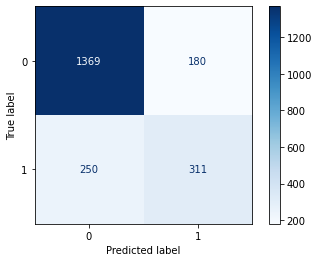

In [21]:
from sklearn.metrics import plot_confusion_matrix

y_pred=knn_model.predict(x_test)
plot_confusion_matrix(knn_model,x_test,y_test,cmap=plt.cm.Blues);

In [22]:
from sklearn.metrics import classification_report

y_pred=knn_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.845584  0.883796  0.864268      1549
           1   0.633401  0.554367  0.591255       561

    accuracy                       0.796209      2110
   macro avg   0.739492  0.719082  0.727761      2110
weighted avg   0.789169  0.796209  0.791680      2110



In [24]:
from sklearn.metrics import roc_curve
y_scores = knn_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

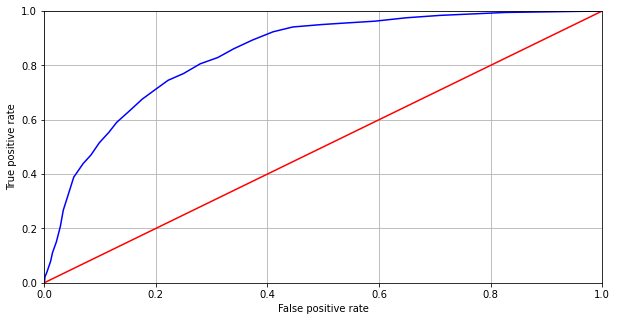

In [25]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [26]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.843316198478922

## Aplication du modele DecisionTreeClassifier

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10)
      } 

tree_grid= GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5)
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [53]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [54]:
tree_model=DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=0)
tree_model.fit(x_train,y_train)
print('train score : ', tree_model.score(x_train,y_train))
print('test score : ', tree_model.score(x_test,y_test))

train score :  0.8228362454286875
test score :  0.79478672985782


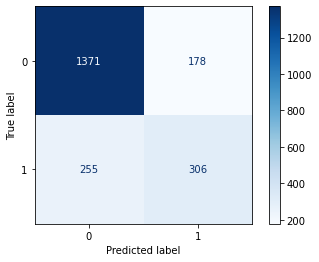

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_model,x_test,y_test,cmap=plt.cm.Blues);

In [56]:
from sklearn.metrics import classification_report

y_pred=tree_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.843173  0.885087  0.863622      1549
           1   0.632231  0.545455  0.585646       561

    accuracy                       0.794787      2110
   macro avg   0.737702  0.715271  0.724634      2110
weighted avg   0.787089  0.794787  0.789715      2110



In [60]:
from sklearn.metrics import roc_curve
y_scores = tree_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

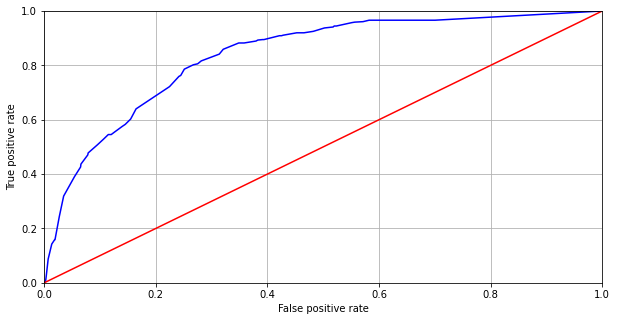

In [61]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [62]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8366544340607304

In [77]:
names=['Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'Multiple Lines_Yes', 'Internet Service_Fiber optic', 'Internet Service_No', 'Online Security_No internet service', 'Online Security_Yes', 'Online Backup_No internet service', 'Online Backup_Yes', 'Device Protection_No internet service', 'Device Protection_Yes', 'Tech Support_No internet service', 'Tech Support_Yes', 'Streaming TV_No internet service', 'Streaming TV_Yes', 'Streaming Movies_No internet service', 'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check', 'Payment Method_Mailed check', 'Tenure Months']

In [78]:
for var, importance in zip(names, tree_model.feature_importances_):
    if importance != 0:
        print(var, importance)

Gender_Male 0.007666145034780716
Senior Citizen_Yes 0.009452872324020223
Partner_Yes 0.018886903876716425
Dependents_Yes 0.08055909398487426
Multiple Lines_Yes 0.01727305362262878
Internet Service_Fiber optic 0.2634531629036648
Online Security_Yes 0.011465972572995857
Online Backup_Yes 0.007167648492966352
Device Protection_No internet service 0.021455764451167265
Device Protection_Yes 0.001796345800704752
Tech Support_Yes 0.011144612211463486
Streaming TV_No internet service 0.013679283059078201
Streaming TV_Yes 0.01622794386855758
Streaming Movies_No internet service 0.00512427540357625
Streaming Movies_Yes 0.013257769317850028
Contract_One year 0.02188742628074672
Contract_Two year 0.010938562899963648
Paperless Billing_Yes 0.0035131785331520664
Payment Method_Credit card (automatic) 0.0016341185722463032
Payment Method_Electronic check 0.027301043043495433
Payment Method_Mailed check 0.006140889669474764
Tenure Months 0.4299739340758761


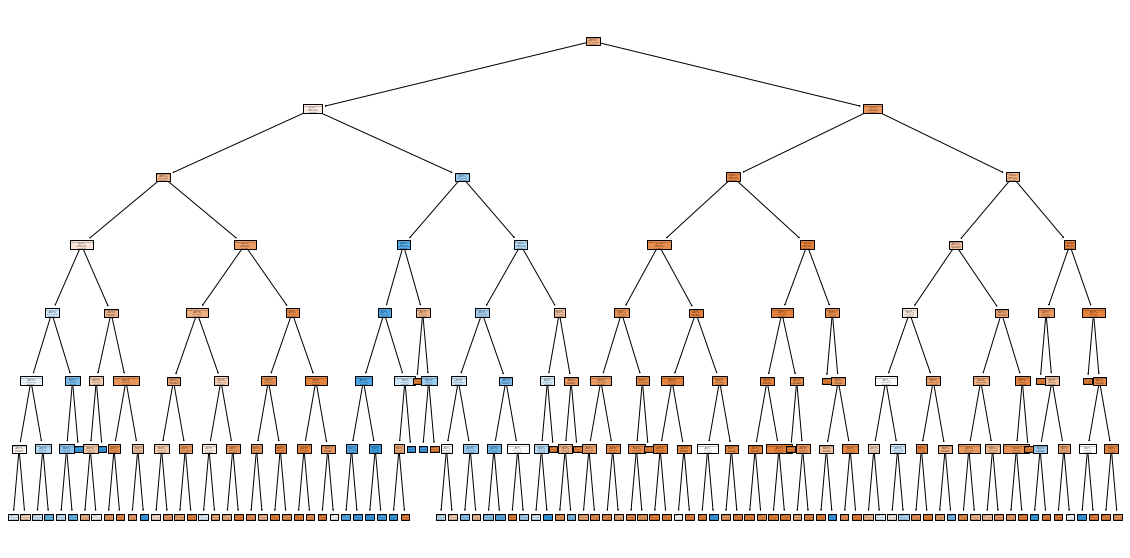

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
c=['quitter', 'rester']
plot_tree(tree_model, feature_names= names, class_names=c, filled=True)
plt.show()

In [80]:
from sklearn.tree import export_text

print(export_text(tree_model,feature_names=names))

|--- Tenure Months <= 0.22
|   |--- Internet Service_Fiber optic <= 0.50
|   |   |--- Tenure Months <= 0.04
|   |   |   |--- Device Protection_No internet service <= 0.50
|   |   |   |   |--- Senior Citizen_Yes <= 0.50
|   |   |   |   |   |--- Payment Method_Electronic check <= 0.50
|   |   |   |   |   |   |--- Tenure Months <= 0.01
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Tenure Months >  0.01
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Payment Method_Electronic check >  0.50
|   |   |   |   |   |   |--- Streaming Movies_Yes <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Streaming Movies_Yes >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Senior Citizen_Yes >  0.50
|   |   |   |   |   |--- Online Security_Yes <= 0.50
|   |   |   |   |   |   |--- Paperless Billing_Yes <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Paperless Billing_Yes >  0.50
|   

## Application du modele NaiveBayes

In [18]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():   #nb.items; parcourir cle et valeur
    s = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.694220420122983,
 'bernoulli': 0.7352612356072801,
 'multinomial': 0.7421707729767653}

In [27]:
bayes_model = MultinomialNB()
bayes_model.fit(x_train, y_train)
print('train score : ' ,bayes_model.score(x_train,y_train))
print('test score : ' , bayes_model.score(x_test,y_test))

train score :  0.7423811458756603
test score :  0.7568720379146919


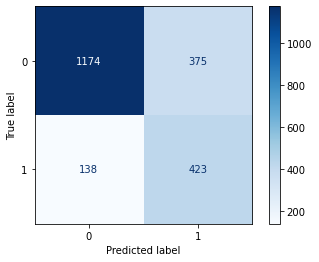

In [28]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(bayes_model,x_test,y_test,cmap=plt.cm.Blues);

In [22]:
from sklearn.metrics import classification_report

y_predi=bayes_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.89482   0.75791   0.82069      1549
           1    0.53008   0.75401   0.62252       561

    accuracy                        0.75687      2110
   macro avg    0.71245   0.75596   0.72160      2110
weighted avg    0.79784   0.75687   0.76800      2110



In [30]:
from sklearn.metrics import roc_curve
y_scores = bayes_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

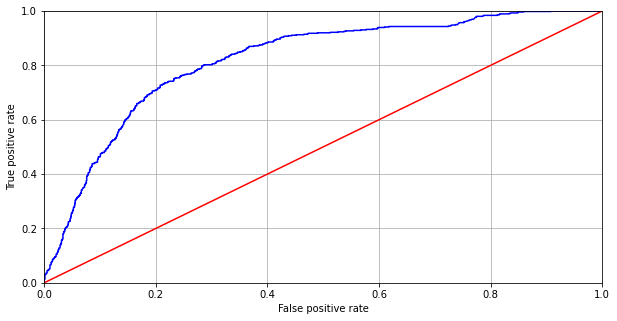

In [31]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [32]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8192278613423185

## Aplication du modele LogisticRegression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log = LogisticRegression(random_state=0)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}

grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2....
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                         'max_iter': [100, 1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs',

In [105]:
grid.best_params_

{'C': 0.10101010101010101, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [123]:
logre_model = LogisticRegression(random_state=0, C=0101., penalty = 'l2', solver='lbfgs')
logre_model.fit(x_train, y_train)

print('train score : ' , logre_model.score(x_train, y_train) )
print('test score : ' , logre_model.score(x_test,y_test) )

train score :  0.8096302316131654
test score :  0.8104265402843602


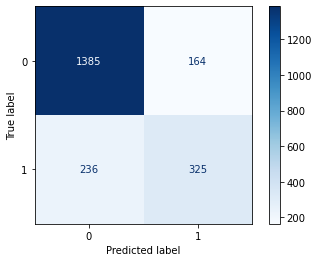

In [113]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logre_model,x_test,y_test,cmap=plt.cm.Blues);

In [114]:
y_predi=logre_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.85441   0.89413   0.87382      1549
           1    0.66462   0.57932   0.61905       561

    accuracy                        0.81043      2110
   macro avg    0.75952   0.73672   0.74643      2110
weighted avg    0.80395   0.81043   0.80608      2110



In [115]:
from sklearn.metrics import roc_curve
y_scores = logre_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

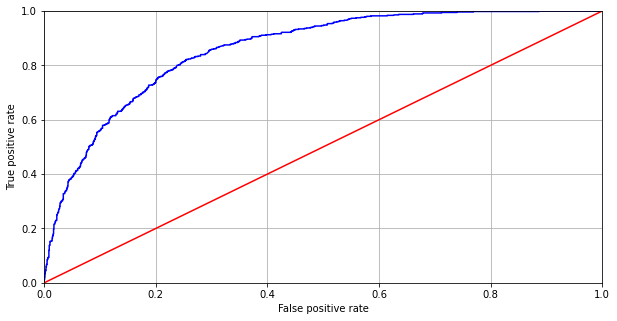

In [116]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [117]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.858682906227812

## Aplication du modele RandomForestClassifier

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10),
      } 

random_grid= GridSearchCV(RandomForestClassifier(),param_grid=param,cv=5)
random_grid.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [131]:
random_grid.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [145]:
random_model=RandomForestClassifier(criterion='gini', max_depth=8,random_state=14)
random_model.fit(x_train,y_train)

print('train score : ' ,random_model.score(x_train,y_train))
print('test score : ' ,random_model.score(x_test,y_test))


train score :  0.8283218203982121
test score :  0.8099526066350711


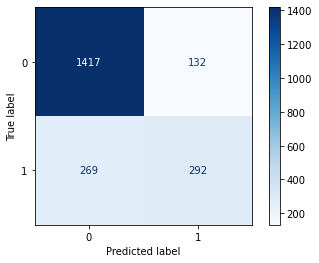

In [146]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(random_model,x_test,y_test,cmap=plt.cm.Blues);

In [147]:
y_predi=random_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.84045   0.91478   0.87604      1549
           1    0.68868   0.52050   0.59289       561

    accuracy                        0.80995      2110
   macro avg    0.76457   0.71764   0.73447      2110
weighted avg    0.80010   0.80995   0.80076      2110



In [151]:
from sklearn.metrics import roc_curve
y_scores = random_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

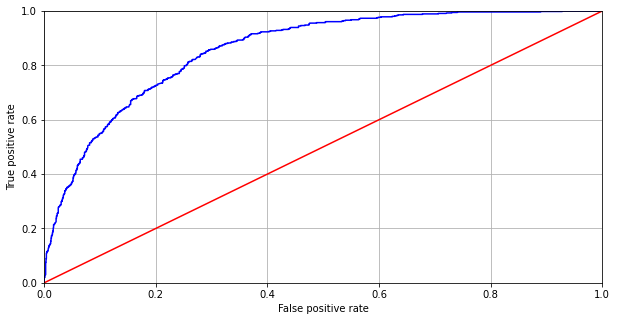

In [152]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [153]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8579734611140072

## Summary table 
## Selection Feature : Varaince  ( with 26 features )

In [76]:
# Regardons la construction d'une DataFrame
import numpy as np
import pandas as pd

l=['KNeighborsClassifier','DecisionTreeClassifier','NaiveBayes(MultiNomial)','LogisticRegression','RandomForestClassifier']
train_score = pd.Series([0.8080,0.8228,0.7423,0.8096,0.8283], index=l)
test_score = pd.Series([0.7962,0.7947,0.7568,0.8104,0.8099], index=l)
f1_score_rester = pd.Series([0.8642,0.8636,0.8206,0.8738,0.8760], index=l)

f1_score_quitter = pd.Series([0.5912,0.5856,0.6225,0.6190,0.5928], index=l)
accuary = pd.Series([0.7962,0.7947,0.7568,0.8104,0.8099], index=l)
auc = pd.Series([0.8433,0.8366,0.8192,0.8586,0.8579], index=l)



In [81]:
stat = pd.DataFrame({'train_score': train_score,
                    'test_score ' : test_score,
                    'f1_score_rester': f1_score_rester,
                    'f1_score_quitter': f1_score_quitter ,
                   'accuary': accuary,
                   'AUC': auc})
stat


,train_score,test_score,f1_score_rester,f1_score_quitter,accuary,AUC
KNeighborsClassifier,0.8080,0.7962,0.8642,0.5912,0.7962,0.8433
DecisionTreeClassifier,0.8228,0.7947,0.8636,0.5856,0.7947,0.8366
NaiveBayes(MultiNomial),0.7423,0.7568,0.8206,0.6225,0.7568,0.8192
LogisticRegression,0.8096,0.8104,0.8738,0.6190,0.8104,0.8586
RandomForestClassifier,0.8283,0.8099,0.8760,0.5928,0.8099,0.8579


## Selection Feature : Varaince  ( with 26 features )